<a href="https://colab.research.google.com/github/leovidith/ML-Email-Classification/blob/main/email_spam_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🔴 Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 🔴 Data Visualisation

In [ ]:
df = pd.read_csv('/content/emails.csv')
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [ ]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [ ]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

## 🔴 Distplot of the first 10 columns in the dataframe

<ipython-input-48-a7924d52f51b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col]).set_title(col)


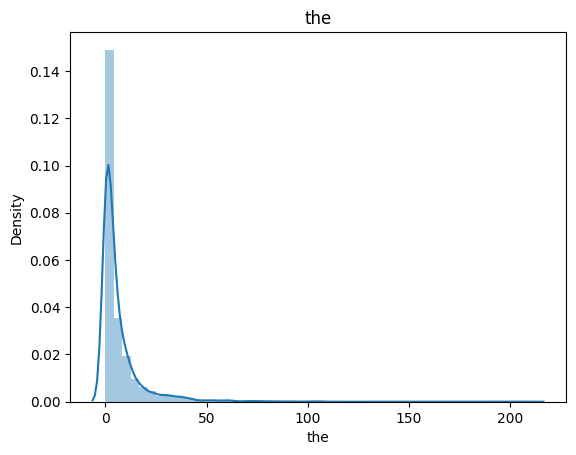

<ipython-input-48-a7924d52f51b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col]).set_title(col)


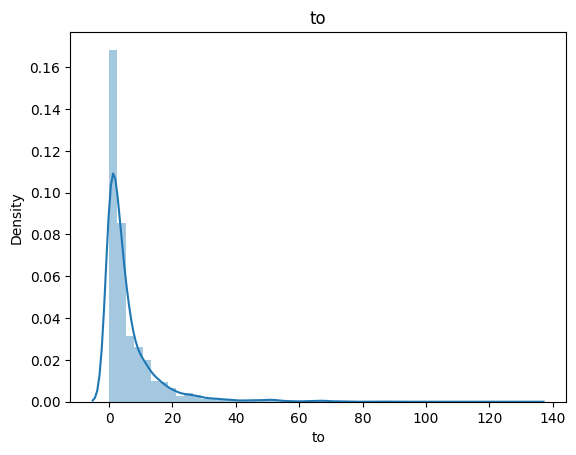

<ipython-input-48-a7924d52f51b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col]).set_title(col)


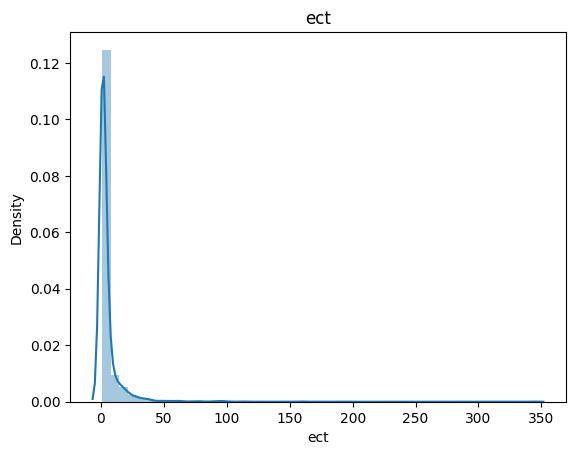

<ipython-input-48-a7924d52f51b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col]).set_title(col)


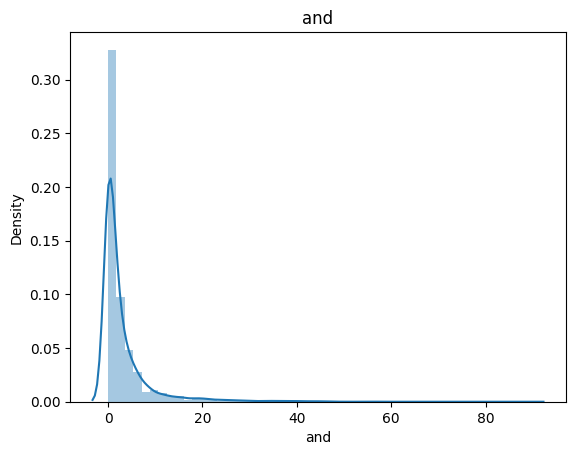

<ipython-input-48-a7924d52f51b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col]).set_title(col)


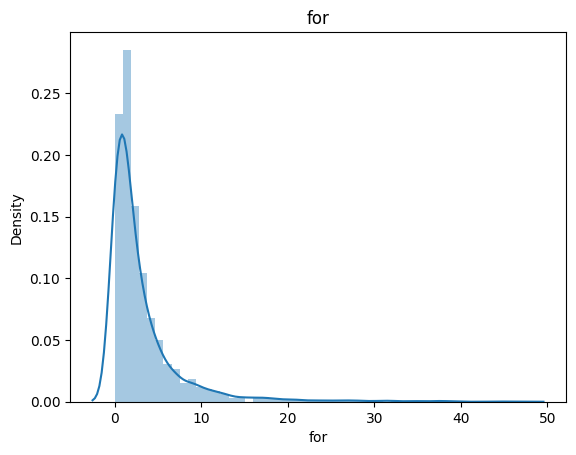

<ipython-input-48-a7924d52f51b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col]).set_title(col)


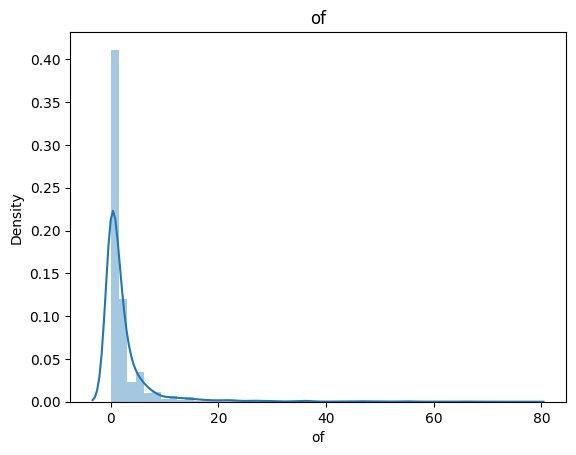

<ipython-input-48-a7924d52f51b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col]).set_title(col)


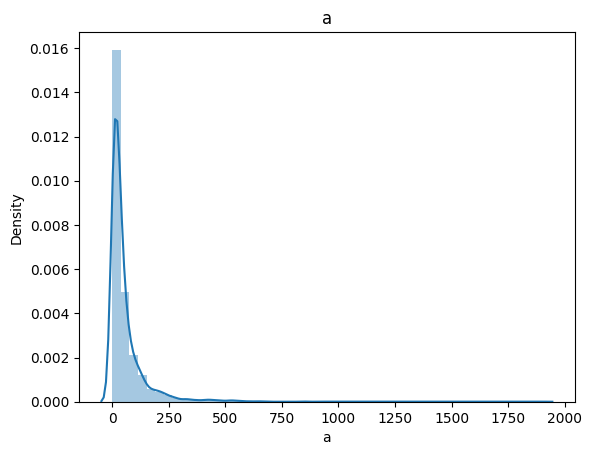

<ipython-input-48-a7924d52f51b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col]).set_title(col)


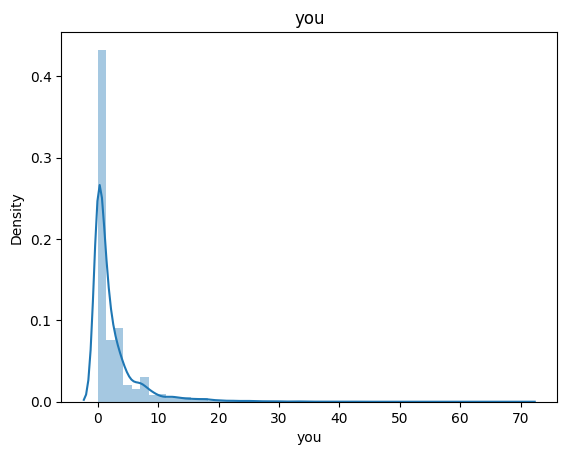

<ipython-input-48-a7924d52f51b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col]).set_title(col)


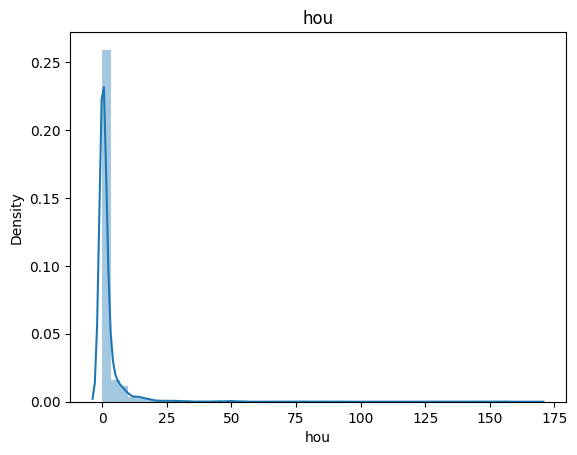

In [ ]:
for col in df.columns[:10]:
    if df[col].dtype != 'object':
        sns.distplot(df[col]).set_title(col)
        plt.show()

## 🔴 Data Selection

In [ ]:
df = df.iloc[:, 1:]

In [ ]:
X = df.iloc[:, :3000]

In [ ]:
y = df.iloc[:, -1]

## 🔴 Data Training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

## 🔴 Naive Baye's Classifier

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

## 🔴 Decision Tree Classifier

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

## 🔴 Model predictions

In [ ]:
nb_pred = nb_classifier.predict(X_test)
dt_pred = dt_classifier.predict(X_test)

In [ ]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

Naive Bayes Accuracy: 0.9497584541062802
Decision Tree Accuracy: 0.9381642512077295


In [ ]:
print("Naive Bayes Report:")
print(classification_report(y_test, nb_pred))

Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       708
           1       0.92      0.92      0.92       327

    accuracy                           0.95      1035
   macro avg       0.94      0.94      0.94      1035
weighted avg       0.95      0.95      0.95      1035



In [ ]:
print("Decision Tree Report:")
print(classification_report(y_test, dt_pred))

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       708
           1       0.92      0.88      0.90       327

    accuracy                           0.94      1035
   macro avg       0.93      0.92      0.93      1035
weighted avg       0.94      0.94      0.94      1035



## 🔴 Visualisations of the Predictions

In [ ]:
nb_pred = nb_classifier.predict(X_test)
dt_pred = dt_classifier.predict(X_test)
def predict_spam_or_not_spam(nb_pred, dt_pred):
    predictions = []
    for nb, dt in zip(nb_pred, dt_pred):
        if nb == dt:
            predictions.append(nb)
        else:
            predictions.append(nb)
    return predictions
final_predictions = predict_spam_or_not_spam(nb_pred, dt_pred)
spam_count = final_predictions.count(1)
not_spam_count = final_predictions.count(0)

In [ ]:
spam_count = sum(df['spam'])
non_spam_count = len(df) - spam_count
total_emails = len(df)
categories = ['Spam', 'Non-spam']
counts = [spam_count, non_spam_count]

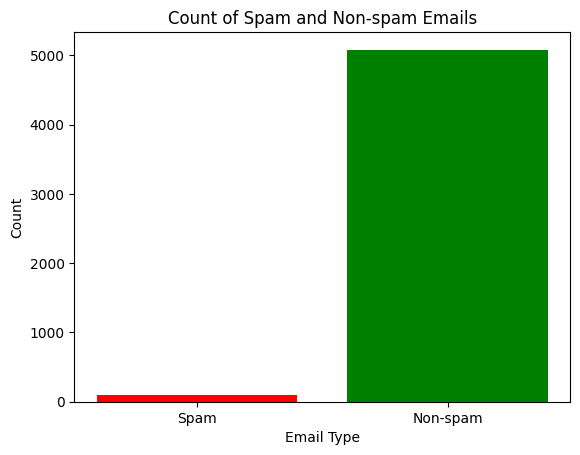

In [ ]:
plt.bar(categories, counts, color=['red', 'green'])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Count of Spam and Non-spam Emails')
plt.show()

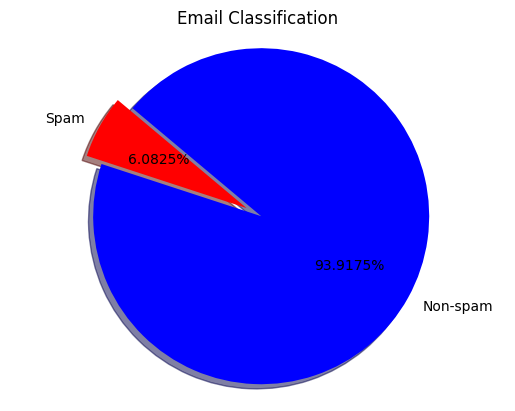

In [ ]:
spam_percent = (spam_count / total_emails) * 100
non_spam_percent = (non_spam_count / total_emails) * 100
labels = 'Spam', 'Non-spam'
sizes = [spam_percent, non_spam_percent]
colors = ['red', 'blue']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.4f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Email Classification')
plt.show()